<a href="https://colab.research.google.com/github/renuk21/CS6200-Information-Retrieval/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [ ]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2021-10-04 16:46:27--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2021-10-04 16:46:27--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2021-10-04 16:46:27--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [ ]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this data, field can be `body` or `title`.

In [ ]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of there basic term statistics. You can make your like easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [ ]:
#helper function to compute highest 6 word count
def get_details(terms, id):
    newterms = []
    terms.sort(key=lambda x: x["count"], reverse=True)
    for i in terms:
        if i['id'] == id:
          newterms.append(i['term'])

    return newterms[:6]

In [ ]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
get_details(terms, "APW_ENG_20100101.0001")

['a', 'the', 'and', 'brooks', 'of', 'to']

In [ ]:
# TODO: Print the 6 terms from document APW_ENG_20100102.0077 with the highest count.
get_details(terms, "APW_ENG_20100102.0077")

['the', 'in', 'to', 'and', 'of', 'a']

In [ ]:
# TODO: Print the 6 terms with the highest total count in the corpus.
import pandas as pd 
df1 = pd.DataFrame(terms)
df1.nunique()
df1['field'].unique()
count_df = df1[['term','count']]
df_count = count_df.groupby(by=['term'])['count'].sum().sort_values(ascending=False)[0:6]


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [ ]:
# TODO: Compute the number of distinct documents in the collection.
N = 0
distinct_list = df1['id'].unique()
print("Distinct document list:")
print(distinct_list)
print("\n")

N = df1['id'].nunique()
print("No. of distinct documents in the collection: ")
print(N)

print("\n")

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df = dict()
count_distinct = df1[['term','id']]
m = count_distinct.groupby(by='term')['id'].nunique().sort_values(ascending = False)
m = pd.DataFrame(m)
df = m.to_dict().get('id')
print("number of distinct documents each term appears in:")
print(df) #document frequency

Distinct document list:
['APW_ENG_20100107.0183' 'APW_ENG_20100107.0114' 'APW_ENG_20100106.0834'
 ... 'APW_ENG_20100107.0621' 'APW_ENG_20100107.0987'
 'APW_ENG_20100107.1027']


No. of distinct documents in the collection: 
2778


number of distinct documents each term appears in:
{'the': 2696, 'in': 2589, 'a': 2571, 'of': 2527, 'and': 2521, 'to': 2482, 'on': 2306, 'for': 2180, 'at': 2020, 'that': 1962, 'was': 1946, 'said': 1928, 'with': 1881, 'is': 1850, 'from': 1849, 'by': 1760, 'has': 1695, 'an': 1631, 'it': 1630, 'as': 1615, 'but': 1499, 'after': 1484, 'he': 1470, 'have': 1462, 'be': 1426, 'not': 1365, 'year': 1317, 'had': 1299, 'are': 1287, 'were': 1274, 'who': 1267, 'will': 1235, 's': 1191, 'his': 1186, 'this': 1184, 'two': 1182, 'been': 1179, 'its': 1170, 'which': 1131, 'more': 1121, 'also': 1103, 'up': 1102, 'about': 1077, 'u': 1063, 'new': 1047, 'last': 1044, 'other': 1033, 'one': 1029, 'they': 994, 'their': 985, 'when': 975, 'out': 971, 'over': 968, 'or': 958, 'than': 955, 'i

In [ ]:
# TODO: Print the relative document frequency of 'the',
# i.e., the proportion of documents that contain 'the'.

df.get('the')/N

0.9704823614110871

Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [ ]:
df2 = pd.DataFrame(terms)
df2['field'].unique()
count_df = df1[['id', 'field', 'term', 'count']]
df2 = count_df.groupby(by=['id', 'field', 'term'])['count'].sum().sort_values(ascending=False)
df2

id                     field  term      
APW_ENG_20100107.0183  body   the           149
APW_ENG_20100107.0114  body   the           104
APW_ENG_20100106.0839  body   the           102
APW_ENG_20100106.1037  body   the           102
APW_ENG_20100106.0834  body   the           102
                                           ... 
APW_ENG_20100105.0808  body   reasons         1
                              recovering      1
APW_ENG_20100107.0184  body   see             1
                              sector          1
APW_ENG_20100107.1067  title  us              1
Name: count, Length: 538301, dtype: int64

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2

,id,field,term,count
0,APW_ENG_20100107.0183,body,the,149
1,APW_ENG_20100107.0114,body,the,104
2,APW_ENG_20100106.0839,body,the,102
3,APW_ENG_20100106.1037,body,the,102
4,APW_ENG_20100106.0834,body,the,102
...,...,...,...,...
538296,APW_ENG_20100105.0808,body,reasons,1
538297,APW_ENG_20100105.0808,body,recovering,1
538298,APW_ENG_20100107.0184,body,see,1
538299,APW_ENG_20100107.0184,body,sector,1


In [ ]:
# Computing IDF
import numpy as np
idfDictionary = dict.fromkeys(df,0)

for word, val in df.items():
  idfDictionary[word] = np.log(N / float(val))
      

print(idfDictionary)

{'the': 0.029962051282091392, 'in': 0.07045954356275139, 'a': 0.07743631604839953, 'of': 0.09469841592609485, 'and': 0.09707559612636928, 'to': 0.11266655754973659, 'on': 0.18621682248528473, 'for': 0.24240636753115433, 'at': 0.31863373291903857, 'that': 0.34776688318898075, 'was': 0.3559552605683387, 'said': 0.36524804814379813, 'with': 0.3899276940132587, 'is': 0.4065456052419186, 'from': 0.4070862919271643, 'by': 0.4564174352820916, 'has': 0.4940485034997385, 'an': 0.5325379206932752, 'it': 0.533151229513481, 'as': 0.5423962876575321, 'but': 0.6169330252116914, 'after': 0.6269900995869634, 'he': 0.6364688435415071, 'have': 0.6419258830045653, 'be': 0.6668579223400479, 'not': 0.7105768156952289, 'year': 0.746374821571008, 'had': 0.7601365066436895, 'are': 0.7694173157181624, 'were': 0.7795696871821804, 'who': 0.7850793429931501, 'will': 0.8106602742522114, 's': 0.8469379539589891, 'his': 0.8511449437566183, 'this': 0.852832707870338, 'two': 0.8545233253482455, 'been': 0.8570646227769

In [ ]:
idf_df = pd.DataFrame.from_dict(idfDictionary, orient='index').reset_index()

In [ ]:
idf_df.columns = ["term","idf"]
idf_df.head()

,term,idf
0,the,0.029962
1,in,0.070460
2,a,0.077436
3,of,0.094698
4,and,0.097076


In [ ]:
tfidf_df = df2.set_index("term").join(idf_df.set_index("term"), lsuffix="_tf").reset_index()

In [ ]:
tfidf_df

,term,id,field,count,idf
0,a,APW_ENG_20100103.0022,body,64,0.077436
1,a,APW_ENG_20100104.0010,body,53,0.077436
2,a,APW_ENG_20100107.0036,body,48,0.077436
3,a,APW_ENG_20100103.0028,body,45,0.077436
4,a,APW_ENG_20100106.0139,body,44,0.077436
...,...,...,...,...,...
538296,zverev,APW_ENG_20100105.0223,body,1,5.444580
538297,zverev,APW_ENG_20100105.0234,body,1,5.444580
538298,zvornik,APW_ENG_20100103.0487,body,1,7.929487
538299,zwolle,APW_ENG_20100106.0878,body,2,7.236339


In [ ]:
#Computing TF
tfidf_df["tf"] = np.log(tfidf_df["count"] +1) 
tfidf_df

,term,id,field,count,idf,tf
0,a,APW_ENG_20100103.0022,body,64,0.077436,4.174387
1,a,APW_ENG_20100104.0010,body,53,0.077436,3.988984
2,a,APW_ENG_20100107.0036,body,48,0.077436,3.891820
3,a,APW_ENG_20100103.0028,body,45,0.077436,3.828641
4,a,APW_ENG_20100106.0139,body,44,0.077436,3.806662
...,...,...,...,...,...,...
538296,zverev,APW_ENG_20100105.0223,body,1,5.444580,0.693147
538297,zverev,APW_ENG_20100105.0234,body,1,5.444580,0.693147
538298,zvornik,APW_ENG_20100103.0487,body,1,7.929487,0.693147
538299,zwolle,APW_ENG_20100106.0878,body,2,7.236339,1.098612


In [ ]:
#Computing TFIDF
tfidf_df["tfidf"] = tfidf_df["tf"]*tfidf_df["idf"]
tfidf_df


,term,id,field,count,idf,tf,tfidf
0,a,APW_ENG_20100103.0022,body,64,0.077436,4.174387,0.323249
1,a,APW_ENG_20100104.0010,body,53,0.077436,3.988984,0.308892
2,a,APW_ENG_20100107.0036,body,48,0.077436,3.891820,0.301368
3,a,APW_ENG_20100103.0028,body,45,0.077436,3.828641,0.296476
4,a,APW_ENG_20100106.0139,body,44,0.077436,3.806662,0.294774
...,...,...,...,...,...,...,...
538296,zverev,APW_ENG_20100105.0223,body,1,5.444580,0.693147,3.773895
538297,zverev,APW_ENG_20100105.0234,body,1,5.444580,0.693147,3.773895
538298,zvornik,APW_ENG_20100103.0487,body,1,7.929487,0.693147,5.496301
538299,zwolle,APW_ENG_20100106.0878,body,2,7.236339,1.098612,7.949931


In [ ]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.

#Adding TFIDF to raw data
tfidf_terms = tfidf_df.to_dict(orient='records')
tfidf_terms

[{'count': 64,
  'field': 'body',
  'id': 'APW_ENG_20100103.0022',
  'idf': 0.07743631604839953,
  'term': 'a',
  'tf': 4.174387269895637,
  'tfidf': 0.3232491719400542},
 {'count': 53,
  'field': 'body',
  'id': 'APW_ENG_20100104.0010',
  'idf': 0.07743631604839953,
  'term': 'a',
  'tf': 3.9889840465642745,
  'tfidf': 0.3088922293417748},
 {'count': 48,
  'field': 'body',
  'id': 'APW_ENG_20100107.0036',
  'idf': 0.07743631604839953,
  'term': 'a',
  'tf': 3.8918202981106265,
  'tfidf': 0.30136822660807094},
 {'count': 45,
  'field': 'body',
  'id': 'APW_ENG_20100103.0028',
  'idf': 0.07743631604839953,
  'term': 'a',
  'tf': 3.828641396489095,
  'tfidf': 0.2964758852145153},
 {'count': 44,
  'field': 'body',
  'id': 'APW_ENG_20100106.0139',
  'idf': 0.07743631604839953,
  'term': 'a',
  'tf': 3.8066624897703196,
  'tfidf': 0.2947739196474419},
 {'count': 44,
  'field': 'body',
  'id': 'APW_ENG_20100106.0177',
  'idf': 0.07743631604839953,
  'term': 'a',
  'tf': 3.8066624897703196,
 

In [ ]:
# TODO: Print the 20 records with the highest tf-idf values.
tfidf_df = tfidf_df.sort_values(by="tfidf", ascending=False)
top20_df = tfidf_df.head(20)
top20_df

,term,id,field,count,idf,tf,tfidf
195927,guarani,APW_ENG_20100103.0028,body,24,7.236339,3.218876,23.292878
311247,nomination,APW_ENG_20100105.0061,body,95,4.933754,4.564348,22.519372
287665,methane,APW_ENG_20100105.0446,body,15,7.929487,2.772589,21.985205
194299,greyhound,APW_ENG_20100105.0014,body,14,7.929487,2.708050,21.473448
253952,kheire,APW_ENG_20100103.0015,body,14,7.929487,2.708050,21.473448
414473,shakespeare,APW_ENG_20100107.0036,body,18,7.236339,2.944439,21.306960
196371,guild,APW_ENG_20100105.0061,body,28,6.137727,3.367296,20.667543
414474,shakespeare,APW_ENG_20100106.0428,body,16,7.236339,2.833213,20.502093
275962,magna,APW_ENG_20100106.0075,body,12,7.929487,2.564949,20.338731
147032,elkhart,APW_ENG_20100102.0197,body,12,7.929487,2.564949,20.338731


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [ ]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
tfidf_df.nunique()
tfidf_df['field'].unique()
count_df_1 = tfidf_df[['term','count','tfidf']]
frequency = count_df_1.groupby(by=['term']).sum().sort_values(by="count", ascending=False)
frequency = pd.DataFrame(frequency).reset_index

print(frequency)

<bound method DataFrame.reset_index of             count       tfidf
term                         
the         62216  228.137914
to          26931  639.132655
in          25659  409.740895
a           23383  410.329291
of          22326  492.069061
...           ...         ...
ornaments       1    5.496301
ornate          1    5.496301
guessed         1    5.496301
contamines      1    5.496301
lately          1    5.496301

[27556 rows x 2 columns]>


In [ ]:
tfidf_df.nunique()
tfidf_df['field'].unique()
count_df_1 = tfidf_df[['term','count','tfidf']]
df_rank = count_df_1.groupby(by=['term']).sum().sort_values(by="tfidf", ascending=False)
df_rank

,count,tfidf
term,,
his,3904,1301.021638
he,5874,1290.282789
u,3518,1271.829436
security,2097,1222.582929
s,3567,1212.345265
...,...,...
imagined,1,5.496301
ilyushin,1,5.496301
cornell,1,5.496301


In [ ]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

df_rank['rank'] = np.arange(df_rank.shape[0])

df_rank['rank'] = df_rank['rank'] + 1 

df_rank

,count,tfidf,rank
term,,,
his,3904,1301.021638,1
he,5874,1290.282789,2
u,3518,1271.829436,3
security,2097,1222.582929,4
s,3567,1212.345265,5
...,...,...,...
imagined,1,5.496301,27552
ilyushin,1,5.496301,27553
cornell,1,5.496301,27554


Text(0.5, 1.0, "Zipf's law log-log plot")

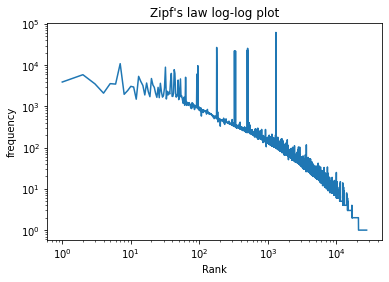

In [ ]:

import matplotlib.pyplot as plt
plt.loglog(df_rank["rank"],df_rank["count"])
plt.xlabel("Rank")
plt.ylabel("frequency")
plt.title("Zipf's law log-log plot")

## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

The collection I am choosing is a collection of text files (.txt) of the BBC news dataset. The dataset has text documents on various genres like business, sports, entertainment, etc. I'll also choose to keep contents like title, subtitle and the text of the articles within these documents.

In [87]:
# TODO: Data acquisition code here.
import os
import pandas as pd
import nltk

In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:

class ArticleCSVParser:
  # Reading and splitting the file
  def read_and_split_file(self, genre: str, file_name: str) -> list:
    text_data = list()
    current_file = os.path.abspath(os.path.join('bbc', genre, file_name))
    if os.path.exists(current_file):
        open_file = open(current_file, 'r', encoding="latin-1")
        text_data = open_file.read().split('\n')
        text_data = list(filter(None, text_data))
    return text_data

  # Extract the information based on genre (bbc news dataset has textfiles segregated into genres)
  def extract_genre_files(self, genre: str) -> pd.DataFrame:
    found = True
    current_number = 1
    titles = list()
    subtitles = list()
    texts = list()
    token_counts = list()
    while found:
        file_name = "{:03d}.txt".format(current_number)
        text_data = self.read_and_split_file(genre, file_name)
        if len(text_data) != 0:
            titles.append(text_data[0])
            subtitles.append(text_data[1])
            article_text = ' '.join(text_data[2:])
            texts.append(article_text)
            token_counts.append(len(nltk.word_tokenize(article_text)))
            current_number += 1
        else:
            found = False

    genres = [genre] * len(titles)
    data = {'genre': genres, 'title': titles, 'subtitle': subtitles, 'text': texts, 'token_counts': token_counts}
    data_frame = pd.DataFrame(data)
    return data_frame

  # Create the dataframe
  def transform_texts_to_df(self, name, genre_list, delimiter = '\t'):
    article_df_list = list()
    for genre in genre_list:
        article_df_list.append(self.extract_genre_files(genre))
    df = pd.concat(article_df_list)
    df.to_csv(name, sep=delimiter)
    return df

In [130]:
import shutil

shutil.rmtree('bbc/')

In [131]:
import zipfile

zipFile = zipfile.ZipFile('bbc-fulltext.zip')
for f in zipFile.namelist():
    if f.endswith('/'):
        os.makedirs(f)
    else: 
        zipFile.extract(f)

In [146]:

if __name__ == "__main__":
    genre_list = ['business', 'entertainment', 'politics', 'sport', 'tech']
    parser = ArticleCSVParser()
    df = parser.transform_texts_to_df('bbc_articles.csv', genre_list)
    

In [181]:
pd.set_option("display.max_columns", None)
print(df)

        genre                              title  \
0    business  Ad sales boost Time Warner profit   
1    business   Dollar gains on Greenspan speech   
2    business  Yukos unit buyer faces loan claim   
3    business  High fuel prices hit BA's profits   
4    business  Pernod takeover talk lifts Domecq   
..        ...                                ...   
396      tech   BT program to beat dialler scams   
397      tech    Spam e-mails tempt net shoppers   
398      tech            Be careful how you code   
399      tech    US cyber security chief resigns   
400      tech   Losing yourself in online gaming   

                                              subtitle  \
0    Quarterly profits at US media giant TimeWarner...   
1    The dollar has hit its highest level against t...   
2    The owners of embattled Russian oil giant Yuko...   
3    British Airways has blamed high fuel prices fo...   
4    Shares in UK drinks and food firm Allied Domec...   
..                         

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [164]:
# TODO: Tokenization code here.
from sklearn.feature_extraction.text import TfidfVectorizer

def create_bag_of_words(df : pd.DataFrame) -> list:
  for piece_of_text in df:
    bag_of_words = piece_of_text.split(' ')
    unique_words = set(bag_of_words)
    unique_words = unique_words.union(set(unique_words))
    num_of_words = dict.fromkeys(unique_words, 0)
    for word in bag_of_words:
      num_of_words[word] += 1
  return unique_words

In [165]:
list1 = []
list1 = create_bag_of_words(df)
list1

{'token_counts'}

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

References:

1. Guggisberg, S. (2020, May 24). Transforming text files to data tables with python. Medium. Retrieved October 4, 2021, from https://towardsdatascience.com/transforming-text-files-to-data-tables-with-python-553def411855. 

2. Maklin, C. (2019, July 21). TF IDF: TFIDF python example. Medium. Retrieved October 4, 2021, from https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76. 

3. Scott, W. (2021, September 26). TF-IDF for document ranking from scratch in Python on Real World Dataset. Medium. Retrieved October 4, 2021, from https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089. 

4. http://mlg.ucd.ie/datasets/bbc.html